In [17]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [19]:
# Build the Sequential feedforward neural network model

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(16, activation='relu', name='layer_1'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [20]:
# Print the model summary

model.summary()
# model.weights

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
layer_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [24]:
# Build the Sequential convolutional neural network model
model = Sequential()
model.add(Conv2D(16, (3,3), padding='SAME', strides=2,  
                 activation='relu', 
                 input_shape=(28,28,1))) ### data_format='channels_first'
model.add(MaxPooling2D(3,3))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [25]:
# Print the model summary

model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 2,730
Trainable params: 2,730
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [26]:
# Define the model optimizer, loss function and metrics

model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy', 'mae', 'top_k_categorical_accuracy']
)

# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=[tf.keras.metrics.SparseTopKCategoricalAccuracy(k=3)])

In [27]:
# Print the resulting model attributes

print(model.optimizer)
print(model.loss)
print(model.metrics)

sparse_categorical_crossentropy
[<tensorflow.python.keras.metrics.MeanMetricWrapper object at 0x7f7fb87cf6d8>, <tensorflow.python.keras.metrics.MeanMetricWrapper object at 0x7f809e7c8c18>, <tensorflow.python.keras.metrics.MeanMetricWrapper object at 0x7f809e74c438>]


***
<a id="coding_tutorial_4"></a>
## The fit method

In [28]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [29]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [30]:
# Print the shape of the training data

train_images.shape
train_labels.shape

(60000,)

In [31]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(train_labels[0])

9


In [32]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images / 255.0


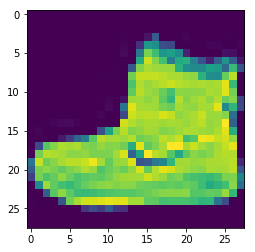

In [33]:
# Display one of the images

plt.imshow(train_images[0])
plt.show()

#### Fit the model

In [34]:
# Fit the model
history = model.fit(train_images[..., np.newaxis], train_labels, epochs=8, batch_size=128)


Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 22s 365us/sample - loss: 1.8121 - accuracy: 0.4364 - mae: 4.4200 - top_k_categorical_accuracy: 0.4507
Epoch 2/8
60000/60000 [==============================] - 21s 345us/sample - loss: 1.0528 - accuracy: 0.6348 - mae: 4.4200 - top_k_categorical_accuracy: 0.5921
Epoch 3/8
60000/60000 [==============================] - 20s 340us/sample - loss: 0.9017 - accuracy: 0.6786 - mae: 4.4200 - top_k_categorical_accuracy: 0.5713
Epoch 4/8
60000/60000 [==============================] - 20s 342us/sample - loss: 0.8275 - accuracy: 0.7082 - mae: 4.4200 - top_k_categorical_accuracy: 0.5583
Epoch 5/8
60000/60000 [==============================] - 20s 340us/sample - loss: 0.7752 - accuracy: 0.7257 - mae: 4.4200 - top_k_categorical_accuracy: 0.5506
Epoch 6/8
60000/60000 [==============================] - 20s 337us/sample - loss: 0.7368 - accuracy: 0.7380 - mae: 4.4200 - top_k_categorical_accuracy: 0.5462
Epoch 7/8
60000/60000 [

#### Plot training history

In [35]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)
df.head()

,loss,accuracy,mae,top_k_categorical_accuracy
0,1.812059,0.436383,4.420002,0.450650
1,1.052799,0.634783,4.420000,0.592133
2,0.901736,0.678583,4.420002,0.571333
3,0.827532,0.708250,4.420002,0.558317
4,0.775247,0.725700,4.420000,0.550617


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

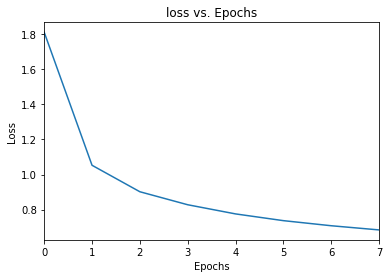

In [36]:
# Make a plot for the loss

loss_plot = df.plot(y='loss', title='loss vs. Epochs', legend=False)
loss_plot.set(xlabel='Epochs', ylabel='Loss')

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

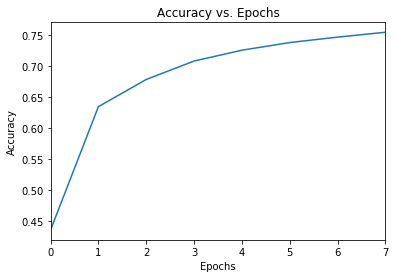

In [37]:
# Make a plot for the accuracy
acc_plot = df.plot(y='accuracy', title='Accuracy vs. Epochs', legend=False)
acc_plot.set(xlabel='Epochs', ylabel='Accuracy')


[Text(0, 0.5, 'MAE'), Text(0.5, 0, 'Epochs')]

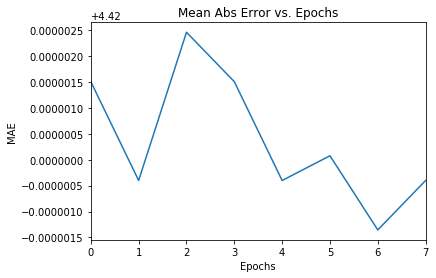

In [38]:
# Make a plot for the additional metric
mae_plot = df.plot(y='mae', title='Mean Abs Error vs. Epochs', legend=False)
mae_plot.set(xlabel='Epochs', ylabel='MAE')

# mae, top_k_categorical_accuracy

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [39]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [40]:
# Evaluate the model

loss = model.evaluate(test_images[...,np.newaxis], test_labels, verbose =2)

10000/1 - 2s - loss: 131.6526 - accuracy: 0.6453 - mae: 4.4200 - top_k_categorical_accuracy: 1.0000


#### Make predictions from the model

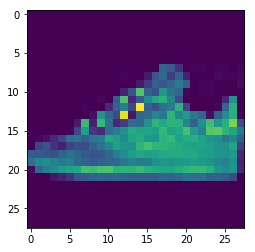

Label: Sneaker


In [47]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [ ]:
# Get the model predictions
predictions = model.predict(test_image[np.newaxis,...,np.newaxis]) ### 
print(f"Model prediction: {labels[np.argmax(predictions)]}")
